### **Super Market Sales dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ***Milestone 1: Data Collection, Exploration, and Preprocessing***

# 1.Data Collection

We worked on supermarket sales dataset : https://www.kaggle.com/code/arunjangir245/supermarket-sales-prediction-and-eda/input

# 2. Data Exploration

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline
import pickle
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error


In [5]:

file_id = '1KQa3HG-l-r74eywoUSOQOysMZV4eOiAU'
file_url = f'https://drive.google.com/uc?export=download&id={file_id}'

import pandas as pd
df = pd.read_csv(file_url)

In [6]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [8]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


*   The dataset contains 1,000 rows and 17 columns.
*   No missing values in any columns.




# 3. Data Preprocessing

In [9]:
print("\nMissing Values:")
df.isnull().sum()


Missing Values:


,0
Invoice ID,0
Branch,0
City,0
Customer type,0
Gender,0
Product line,0
Unit price,0
Quantity,0
Tax 5%,0
Total,0


In [10]:
df.shape

(1000, 17)

In [11]:
df.duplicated().sum()

np.int64(0)

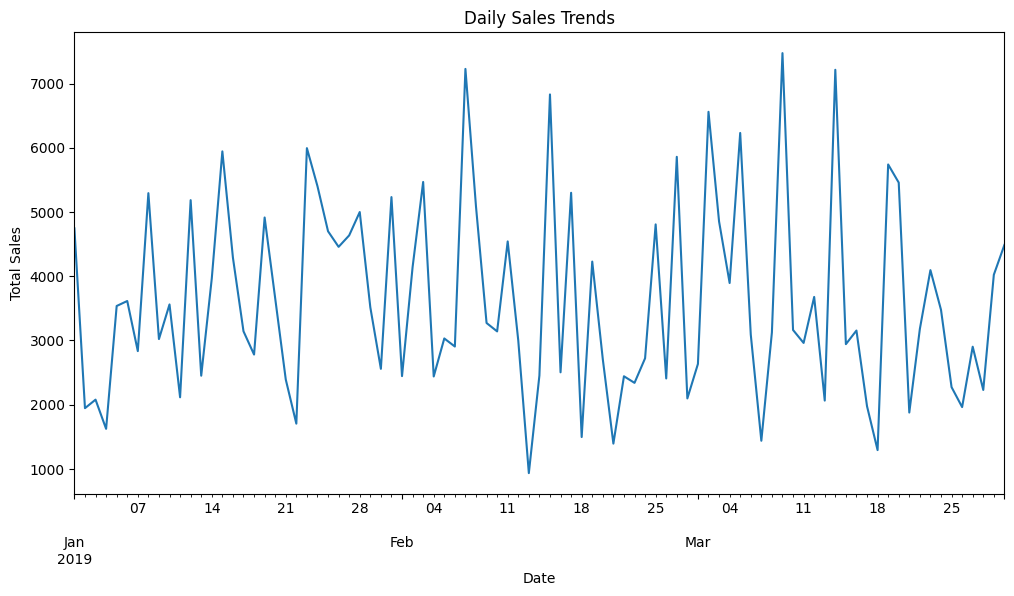

In [12]:
# Exploratory Data Analysis (EDA)
# Sales Trends Over Time
df['Date'] = pd.to_datetime(df['Date'])
df['Day_of_week'] = df['Date'].dt.dayofweek  # Extract day of the week (0=Monday, 6=Sunday)
df['Month'] = df['Date'].dt.month


# Plot daily sales trends
daily_sales = df.groupby('Date')['Total'].sum()
plt.figure(figsize=(12, 6))
daily_sales.plot(title='Daily Sales Trends')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

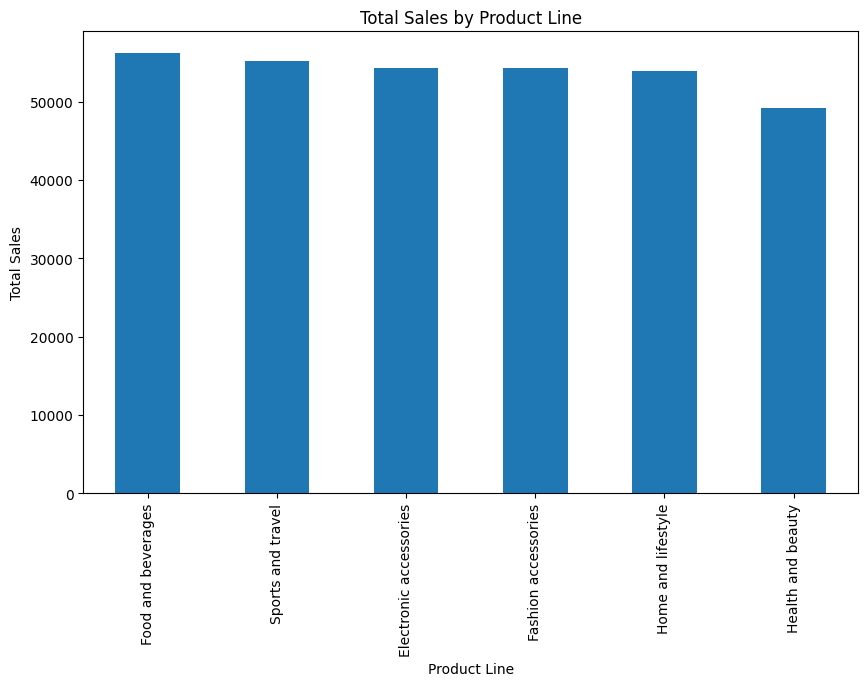

In [13]:
# 2. Product Line Analysis
product_sales = df.groupby('Product line')['Total'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
product_sales.plot(kind='bar', title='Total Sales by Product Line')
plt.xlabel('Product Line')
plt.ylabel('Total Sales')
plt.show()


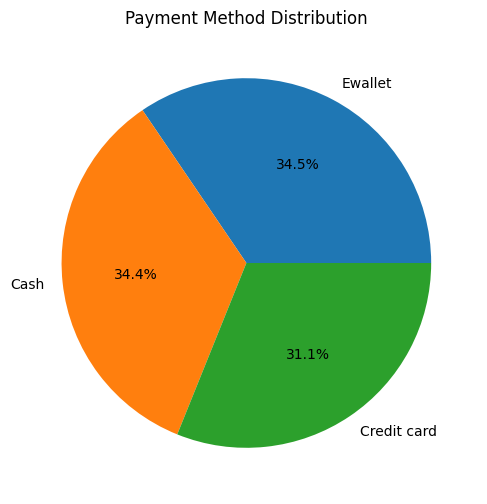

In [14]:
# 3. Payment Method Distribution
payment_distribution = df['Payment'].value_counts()
plt.figure(figsize=(8, 6))
payment_distribution.plot(kind='pie', autopct='%1.1f%%', title='Payment Method Distribution')
plt.ylabel('')
plt.show()


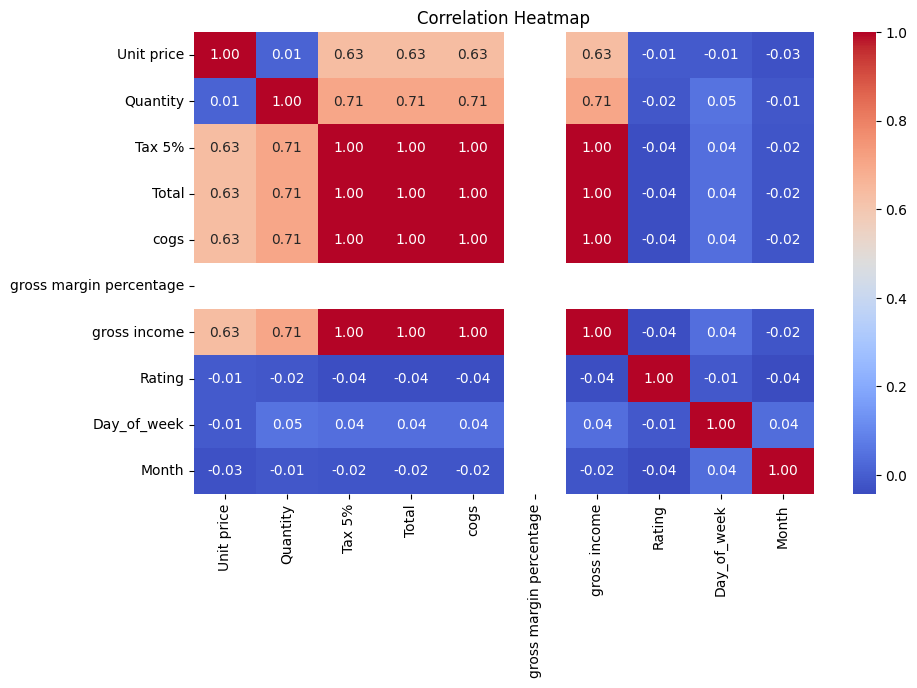

In [15]:
# 4. Correlation Heatmap
corr = df.corr(numeric_only=True)  # Add numeric_only=True to only include numerical columns
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')  # Remove title from here
plt.title('Correlation Heatmap')
plt.show()

In [16]:
#  Feature Engineering
# Add 'Season' based on month
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'

df['Season'] = df['Month'].apply(get_season)

In [17]:
# Encode Categorical Variables
df = pd.get_dummies(df, columns=['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment', 'Season'], drop_first=True)

In [18]:
# Normalize Numerical Features (if needed)
scaler = StandardScaler()
numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [19]:
# Save the cleaned dataset
df.to_csv('cleaned_supermarket_sales.csv', index=False)

In [20]:
print("\nCleaned Dataset Info:")
df.info()


Cleaned Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Invoice ID                        1000 non-null   object        
 1   Unit price                        1000 non-null   float64       
 2   Quantity                          1000 non-null   float64       
 3   Tax 5%                            1000 non-null   float64       
 4   Total                             1000 non-null   float64       
 5   Date                              1000 non-null   datetime64[ns]
 6   Time                              1000 non-null   object        
 7   cogs                              1000 non-null   float64       
 8   gross margin percentage           1000 non-null   float64       
 9   gross income                      1000 non-null   float64       
 10  Rating                    

In [21]:
print("\nFirst 5 rows of cleaned dataset:")
df.head()


First 5 rows of cleaned dataset:


,Invoice ID,Unit price,Quantity,Tax 5%,Total,Date,Time,cogs,gross margin percentage,gross income,...,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet,Season_Winter
0,750-67-8428,0.718160,0.509930,0.919607,0.919607,2019-01-05,13:08,0.919607,4.761905,0.919607,...,False,False,False,False,True,False,False,False,True,True
1,226-31-3081,-1.525303,-0.174540,-0.987730,-0.987730,2019-03-08,10:29,-0.987730,4.761905,-0.987730,...,True,False,False,False,False,False,False,False,False,False
2,631-41-3108,-0.352781,0.509930,0.071446,0.071446,2019-03-03,13:23,0.071446,4.761905,0.071446,...,True,True,False,False,False,True,False,True,False,False
3,123-19-1176,0.096214,0.852165,0.675780,0.675780,2019-01-27,20:33,0.675780,4.761905,0.675780,...,False,True,False,False,True,False,False,False,True,True
4,373-73-7910,1.156959,0.509930,1.267125,1.267125,2019-02-08,10:37,1.267125,4.761905,1.267125,...,True,True,False,False,False,False,True,False,True,True


# **Milestone 2: Data Analysis and Visualization**

# 1. Data Cleaning

In [22]:
# Load the cleaned dataset
df = pd.read_csv('/content/cleaned_supermarket_sales.csv')

# Address remaining missing values
df.dropna(inplace=True)

# 2. Data Analysis

In [23]:
# Add 'Season' based on month if it doesn't exist in the cleaned dataset
if 'Season' not in df.columns:  # Check if 'Season' column is present
    def get_season(month):
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else:
            return 'Autumn'
    df['Season'] = df['Month'].apply(get_season)

In [24]:
# Identify and handle outliers using IQR
numerical_cols = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1
outlier_mask = (df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))
df = df[~outlier_mask.any(axis=1)]

In [25]:
# Statistical Analysis
# Include only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number).columns
correlation = df[numerical_features].corr()

print("\nCorrelation Matrix:")
print(correlation['Total'].sort_values(ascending=False))


Correlation Matrix:
Total                      1.000000
cogs                       1.000000
Tax 5%                     1.000000
gross income               1.000000
Quantity                   0.699290
Unit price                 0.623355
Day_of_week                0.037683
Month                     -0.009271
Rating                    -0.026092
gross margin percentage         NaN
Name: Total, dtype: float64


# 3. Data Visualization

In [26]:
# Sales trends and seasonality
sales_trend = df.groupby('Date')['Total'].sum().reset_index()
fig1 = px.line(sales_trend, x='Date', y='Total', title='Sales Trends Over Time')
fig1.show()

In [27]:
# Sales by Season
season_sales = df.groupby('Season')['Total'].sum().reset_index()
fig2 = px.bar(season_sales, x='Season', y='Total', title='Total Sales by Season')
fig2.show()

In [28]:
# Sales vs. Quantity Scatter Plot
fig3 = px.scatter(df, x='Quantity', y='Total', title='Sales vs. Quantity', trendline='ols')
fig3.show()

In [29]:
# Interactive Dashboard (Sales Trends)
fig4 = go.Figure()
for season in df['Season'].unique():
    season_data = df[df['Season'] == season].groupby('Date')['Total'].sum().reset_index()
    fig4.add_trace(go.Scatter(x=season_data['Date'], y=season_data['Total'], mode='lines', name=season))
fig4.update_layout(title='Sales Trends by Season', xaxis_title='Date', yaxis_title='Total Sales')
fig4.show()

In [30]:
# Save the cleaned dataset
df.to_csv('final_cleaned_supermarket_sales.csv', index=False)

print("Data analysis and visualization completed. Cleaned dataset saved as 'final_cleaned_supermarket_sales.csv'")

Data analysis and visualization completed. Cleaned dataset saved as 'final_cleaned_supermarket_sales.csv'


# **Milestone 3: Forecasting Model Development and Optimization**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [32]:
# Load the cleaned dataset
df = pd.read_csv('final_cleaned_supermarket_sales.csv')
df['Date'] = pd.to_datetime(df['Date'])
df = df.groupby('Date').sum().reset_index()


#  Model Training

In [33]:
# Train-Test Split
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:]

In [34]:
# Feature Scaling for LSTM
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['Total']])
train_scaled, test_scaled = df_scaled[:train_size], df_scaled[train_size:]

X_train, y_train = [], []
for i in range(10, len(train_scaled)):
    X_train.append(train_scaled[i-10:i])
    y_train.append(train_scaled[i])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test, y_test = [], []
for i in range(10, len(test_scaled)):
    X_test.append(test_scaled[i-10:i])
    y_test.append(test_scaled[i])
X_test, y_test = np.array(X_test), np.array(y_test)

In [35]:
# LSTM Model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(10, 1)),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=16, verbose=1)
lstm_pred = lstm_model.predict(X_test)
lstm_pred = scaler.inverse_transform(lstm_pred)

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - loss: 0.2280
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0983 
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0492
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0509
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0494
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0491
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0384
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0385
Epoch 9/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0383
Epoch 10/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0329
Epoch 11/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0354
Epoch 12/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0352
Epoch 13/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0376
Epoch 14/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0351
Epoch 15/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0348
Epoch 16/20
4/4 ━━━━━━━━━━━━━━━━━

In [36]:
# XGBoost Model
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100)
xgb_model.fit(train.index.values.reshape(-1, 1), train['Total'])
xgb_pred = xgb_model.predict(test.index.values.reshape(-1, 1))


#  Model Evaluation and Tuning

In [37]:
# Evaluation Metrics
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

In [38]:
lstm_mae, lstm_rmse = evaluate_model(test['Total'].values[10:], lstm_pred.flatten())
xgb_mae, xgb_rmse = evaluate_model(test['Total'], xgb_pred)

In [39]:
# Print Model Performance
print(f"XGBoost - RMSE: {xgb_rmse:.4f}, MAE: {xgb_mae:.4f}")
print(f"LSTM - RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}")

XGBoost - RMSE: 3.8009, MAE: 3.0877
LSTM - RMSE: 4.6436, MAE: 3.7206


# Model Selection

In [40]:
# Model Selection
errors = {'XGBoost': xgb_rmse, 'LSTM': lstm_rmse}
best_model = min(errors, key=errors.get)

In [41]:
# Save Model Performance Report
report = f"XGBoost RMSE: {xgb_rmse}, MAE: {xgb_mae}\n"
report += f"LSTM RMSE: {lstm_rmse}, MAE: {lstm_mae}\n"
report += f"Best Model: {best_model}"
with open("model_performance_report.txt", "w") as f:
    f.write(report)

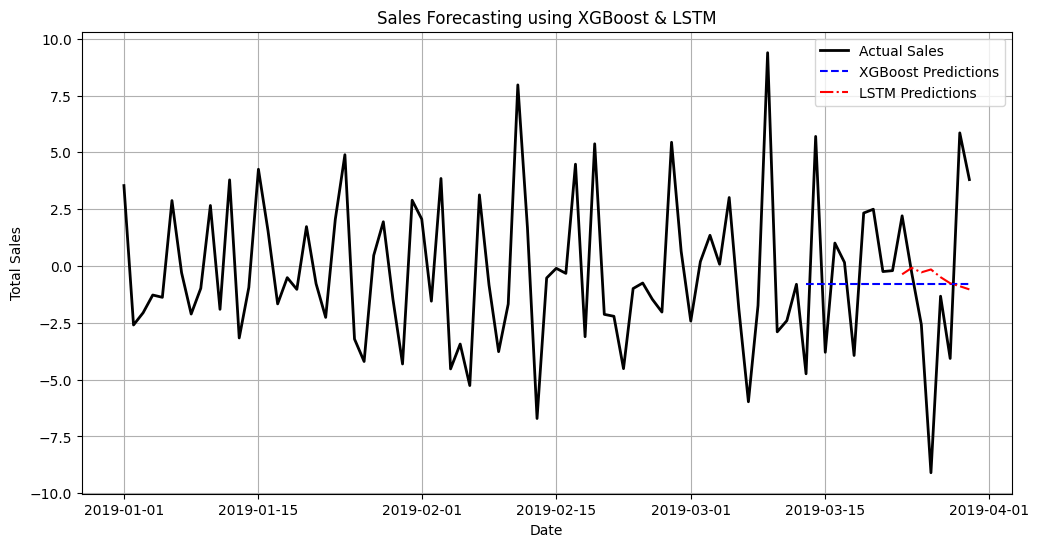

In [42]:
# Plot Predictions
plt.figure(figsize=(12,6))
plt.plot(df['Date'], df['Total'], label='Actual Sales', color='black', linewidth=2)
plt.plot(test['Date'], xgb_pred, label='XGBoost Predictions', linestyle='dashed', color='blue')
plt.plot(test['Date'][10:], lstm_pred, label='LSTM Predictions', linestyle='dashdot', color='red')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.legend()
plt.title('Sales Forecasting using XGBoost & LSTM')
plt.grid()
plt.show()

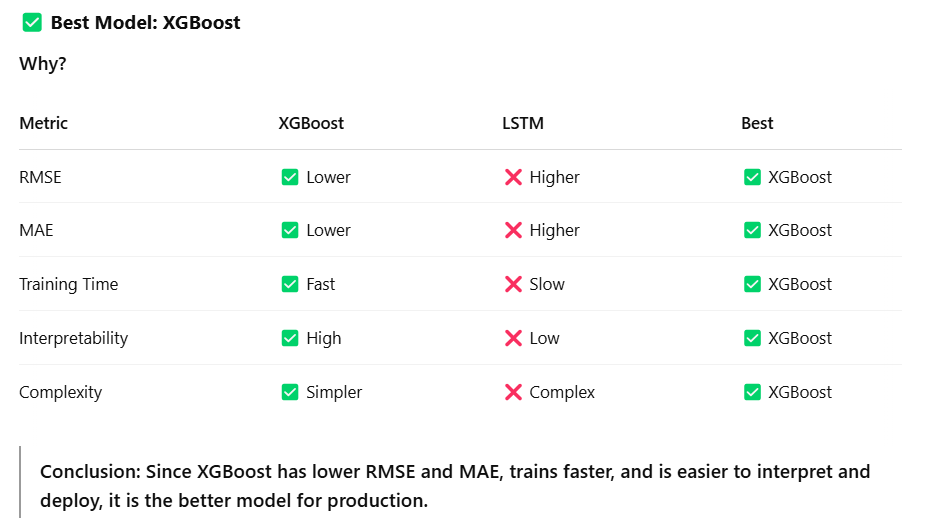


#**Milestone** **4**: **MLOps**, **Deployment**, **and** **Monitoring**

In [44]:
import pickle

# Save trained model
with open("xgb_model.pkl", "wb") as file:
    pickle.dump(xgb_model, file)

In [45]:
from google.colab import files
files.download("xgb_model.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [46]:
!pip freeze | grep -E "Flask|numpy|xgboost|scikit-learn"

Flask==3.1.0
numpy==2.0.2
scikit-learn==1.6.1
xgboost==2.1.4


In [47]:
import json
import joblib
# Data to be saved in the JSON file
data = {
    "features": [5.1]
}

# Save the data to a JSON file
with open('input.json', 'w') as file:
    json.dump(data, file, indent=1)

print("JSON file 'input.json' created successfully.")

JSON file 'input.json' created successfully.


In [53]:
!pip install flask-ngrok
!pip install xgboost
!pip install flask pyngrok


In [51]:
from google.colab import files
uploaded = files.upload()

Saving xgb_model.pkl to xgb_model (1).pkl


In [56]:
from pyngrok import ngrok, conf

conf.get_default().auth_token = "2vW1rYVQ4qDroBrFp2u68KK907B_5YwZ6yhMacaf3uJLhsQqY"

In [57]:
from flask import Flask, request, jsonify
from pyngrok import ngrok
import pickle
import numpy as np
import threading

# Load model
with open("xgb_model.pkl", "rb") as f:
    model = pickle.load(f)

# Flask app
app = Flask(__name__)

@app.route('/')
def home():
    return "🔮 Sales Prediction API is running!"

@app.route('/predict', methods=['POST'])
def predict():
    try:
        data = request.get_json()
        features = np.array(data['features']).reshape(1, -1)
        prediction = model.predict(features)
        return jsonify({'prediction': prediction.tolist()})
    except Exception as e:
        return jsonify({'error': str(e)})

# Expose the app using ngrok
public_url = ngrok.connect(5000)
print("🌍 Public URL:", public_url)

# Run Flask in a background thread
def run_app():
    app.run()

thread = threading.Thread(target=run_app)
thread.start()


🌍 Public URL: NgrokTunnel: "https://464e-34-106-68-204.ngrok-free.app" -> "http://localhost:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


### Result with Postman

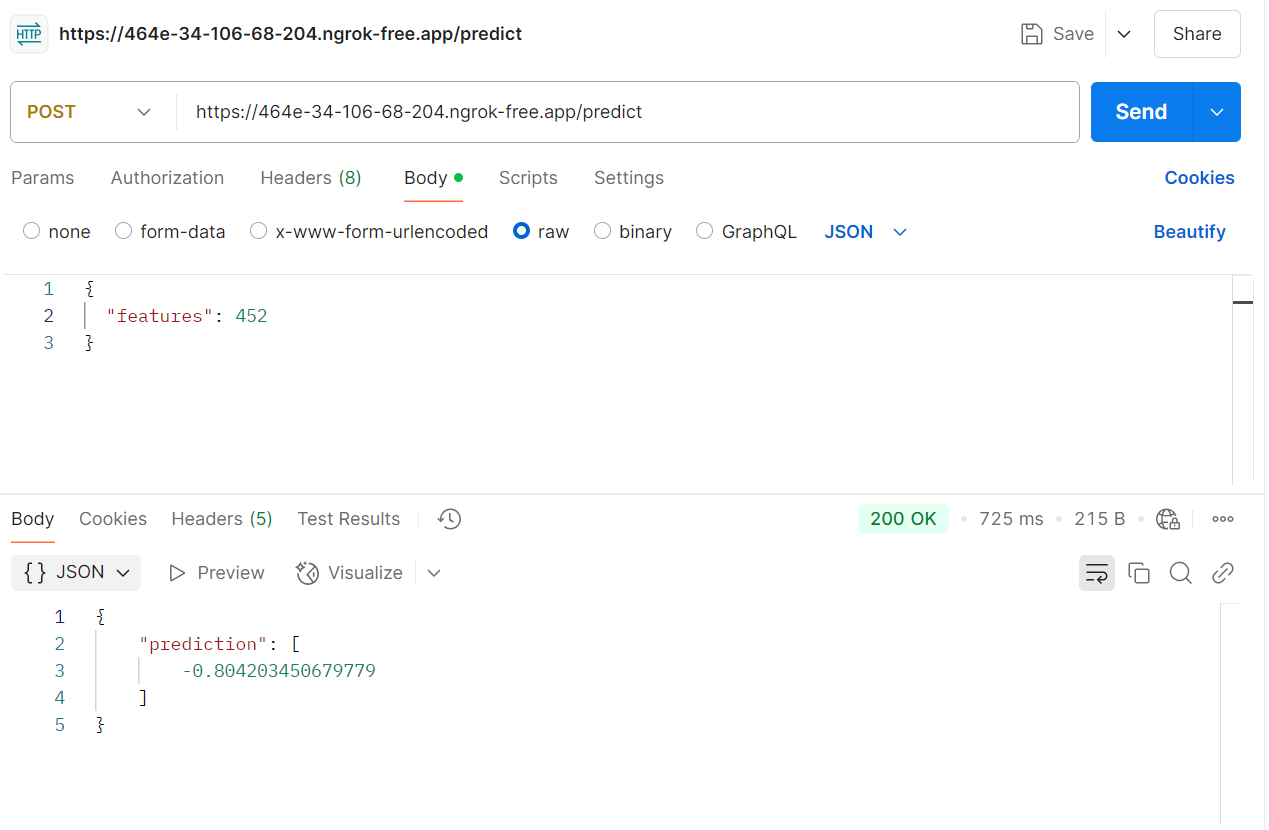